In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.isnull().sum()

Study Hours    0
Exam Score     0
dtype: int64

In [6]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


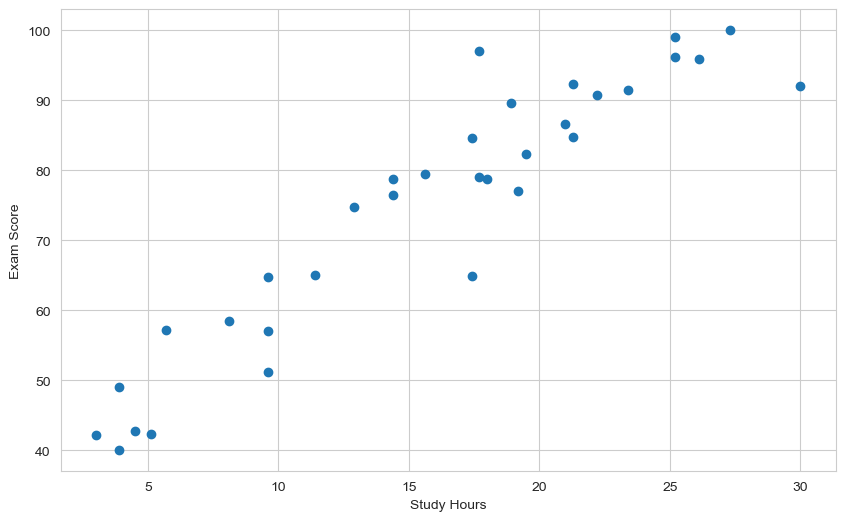

In [7]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.scatter(x="Study Hours", y="Exam Score" ,data=df)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()
# Bu veri seti gayet temiz ve boş veri olmayan çok küçük bir veri setidir.
# Sadece iki kolon var, biri çalışma süresi biri de sınav sonucu. Yani sadece 1 girdimiz ve 1 çıktımız var.
# Grafikleri çizerken genelde y eksenine hedef çıktımızı x eksenine de diğer değişkenleri yerleştiririz.
# Bu grafiğe bakınca pozitif bir korelasyon olduğunu ve çalışma süresi arttıkça Sınav sonucunun yükseldiğini görüyoruz.

In [8]:
# independent and dependent features:
X = df["Study Hours"]
y = df["Exam Score"]
# Genelde veri setini ayırırken hedef çıktımızı küçük y adındaki bir değişkene kaydederiz.
# Diğer özelliklerimizi ise Büyük X değişkenine kaydederiz.
# Bunun sebebi çıktı ile çıktıyı etkileyen özellikleri birbirleri ile karıştırmamaktır.
# Makine öğrenmesi algoritmaları X'i bizden bir dataframe olarak bekler.
# y'yi ise bir series objesi olarak bekler.
# Çünkü y sadece bir çıktı olur, X ise y'yi etkileyen birden fazla özellik olur. Bu nedenle y series, X dataframe olmalıdır.

## Train - Test split

In [9]:
print(type(X))
print(type(y))
# Çıktı kısmında bir sıkıntımız yok, çıktımız sadece bir tane ve zaten bir series objesi olarak durmaktadır.
# Fakat bu datasette sadece bir özelliğmiz olduğu için X değişkeni de bir series olarak gözükmektedir.
# Bunu çözmek için X değişkeninde 4 adet köşeli parantez kullanabiliriz.
# Çünkü o zaman birden fazla özellik verecekmiş gibi oluruz ve bu nedenle X değişkeni bir dataframe olarak kaydolur.

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
X = df[["Study Hours"]]
print(type(X))
# İşte bu sefer X değişkenimiz bir dataframe objesine dönüştü

<class 'pandas.core.frame.DataFrame'>


In [11]:
# Train - Test split:
# Biz veri setleri ile makine öğrenmesi modellerini eğitirken genelde veri setini 4'e böleriz.
# Bu işlemin %50'sini az önce yaptık. Yani özellikler ve çıktımızı X ve y diye ayırdık.
# Şimdi de Veri setini modeli eğitmek ve test etmek için ayıracağız.
# Yani veri setinin bir kısmı ile modelimizi eğiteceğiz, bir kısmı ile de modelimizi test edeceğiz.
# Bu işlem için scikit-learn kütüphanesinden yararlanacağız.

In [12]:
from sklearn.model_selection import train_test_split
# sklearn kütüphanesinin model_selection modülünden trani_test_split metodunu import ettik.
# Şimdi bu metodu kullanarak az önce ayırdığımız çıktıları ve özellikleri ayıracağız.
# Bir kısmını modeli eğitmek için, bir kısmını da modeli test etmek için kullanacağız.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
# Elimizde bir X özellikleri bir de y çıktısı vardı.
# Önce bu iki değişkeni train_test_split metoduna veriyoruz.
# Daha sonra test_size boyutunu veriyoruz. Buraya verdiğimiz değer yüzde kaçının test için ayrılması gerektiğini belirtir.
# Genellikle endüstride 20-33 arası olur ve veriden veriye değişir.
# Bizim veri setimiz küçük olduğu için %20'sini test için ayırdık.
# Geriye kalan verileri de train yani eğitim için kullanırız.
# random_state değişkeni de her çalıştırmada aynı rastgele sonucu elde etmek için verebiliriz.
# Genellikle train_test_split metoduna önce özellikleri, sonra çıktıları veririz.
# metod da bizim için önce özelliğin eğitim kısmını sonra da test kısmını verir.
# Çıktı kısmında da aynı şekilde önce eğitim kısmını sonra test kısmını verir.
# Bu verileri X_train, X_test, y_train, y_test sırasılya kaydederiz. Bu veri biliminin bir raconudur.

In [14]:
print("X_Train: \n{}\n".format(X_train))
print("X_Test: \n{}\n".format(X_test))
print("y_Train: \n{}\n".format(y_train))
print("y_Test: \n{}\n".format(y_test))

X_Train: 
    Study Hours
18         17.4
1           9.6
2           4.5
32         18.9
6          19.2
3          11.4
29         19.5
26          9.6
9          17.4
4          14.4
28         17.7
10         21.3
27         15.6
13         27.3
17         12.9
15         17.7
22         14.4
31         25.2
11         26.1
7          22.2
0           3.9
23          3.0
5          18.0
12         30.0
21          8.1
8          25.2

X_Test: 
    Study Hours
25          5.1
14         21.0
30         23.4
16          5.7
24          9.6
20          3.9
19         21.3

y_Train: 
18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

y_Test: 
25    42.4
14    86.6
30    91.5
16    57.2
24    51.2

## Standartization

In [15]:
# Standartization demek, verileri ortalaması 0 ve standart sapması 1 olacak şekilde yeniden ölçeklendirmek demektir.
# Daha da derin ve anlaşılır şekilde bu konuyu açıklayalım:
# Bir veri setimiz olabilir ve her feature'umuz yani kolonumuz alakasız değerler taşıyabilir.
# Yani birilerinde 1-10 değerleri varken birinde 1000-10000 değerleri olabilir.
# Biz z-skoru ile bu kolonların hepsini ortalaması 0 ve standart sapması 1 olacak şekilde standartize ediyoruz.
# Böylece bütün verileri aynı ölçeklere yazmış oluyoruz ve bu da etkilerini anlamamızı kolaylaştırır.
# Bu modelimizin hatalarını minimize etmek için de kolaylık sağlar 
# Çünkü abuk subuk değerker gradient descent ile teta değerlerinin güncellenmesini zorlaştırır.
# Ama bu işlemi sadece X'lere uygularız, y'ye yani çıktımıza standartization uygulamayız.
# Bu işlem içinde scikit-learn kütüphanesinden yararlanabiliriz.

In [16]:
from sklearn.preprocessing import StandardScaler
# burada sklearn.preproccesing modülünden StandartScaler sınıfını import ettik. Bunu kullanarak verilerimizi standartize edeceğiz.

In [17]:
scaler = StandardScaler()
# StandartScaler sınıfından bir obje oluşturduk, bunu kullanarak verilerimizi ölçeklendireceğiz.

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Burası çok ama çok öenml bir yerdir, bu kısmı anlamadan makine öğrenmesini anlamak imkansızdır.
# Eğitim için kullanılacak datasete fit_transform uyguluyoruz.
# Yani önce ortalamayı, standart sapmayı vs. hesaplıyoruz(fit), daha sonra bunlarla standartize ediyoruz(transform)
# Ama test verisini sadece transform ediyoruz, yani test verisinin parametrelerini hesaplamıyoruz.
# Bunu sebebi modelimizin test verisi hakkında bir ön bilgiye sahip olmasını engellemektir.
# Yani veri sızması (data leakege)'nı önlüyoruz. Böylece model sadece train datasından öğrendikleriyle doğru tahminler yapıyor.
# Eğer modelimiz test datası hakkında biraz bilgi sahibi olursa yanıltıcı tahminler yapabilir.
# Ve bu da modelimizin gerçek dünya perdormansını görmemize engel olur.
# Bu nedenle parametreleri modelimize train datasında öğretiriz ve test datasını da o parametrelerle dönüştürürüz.

In [19]:
X_train_scaled
# Görüldüğü gibi Özelliklerimiz aynı ölçeğe getirildi.
# Bu sayede daha kolay düzeltmeler ve tahminler yapabileceğiz

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [20]:
X_test_scaled

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

## Model Building

In [21]:
from sklearn.linear_model import LinearRegression
# Burada kullanacağımız lineer regresyon modelini sklearn.linear_model modülünden içe aktardık.

In [22]:
regression = LinearRegression()
# LinearRegression sınıfından bir tane obje oluturduk. Bu obje üzerinden modelimizi eğiteceğiz ve tahmin yapmayı deneyeceğiz.
# Eğer model çok yavaş çalışıyorsa buradaki njobs parametresini -1 yaparak CPU'nun daha yoğun çalışmasını sağlayabiliriz.

In [23]:
regression.fit(X_train_scaled, y_train)
# Modelimizi fit metodunu kullanarak ve parametre olarak da az önce oluşturduğumuz eğitim verilerini vererek eğitiyoruz.
# Önce özellikleri barındıran verileri, daha sonra çıktıları barındıran verileri parametre olarak veriyoruz.
# Ve gördüğünüz gibi modelimiz oluştu.

LinearRegression()

In [24]:
print("Coefficent: ", regression.coef_)
print("Intercept: ", regression.intercept_)
# Burada oluşturduğumuz modelin teta0 ve teta1 değerlerini görüyoruz.
# Burada Intercept değişkeni modelimizin y-kesişim noktası olmaktadır.
# Coefficent ise modelimizin çıktısını etkileyen özelliğin katsayısı olmaktadır.
# Yani denklemimiz y = 17.18x + 71.59 'a yakın olmaktadır.
# Fakat burada x değerlerimiz standartize edilmiş X değerlerimizdir.
# Yani çıktılar standartize edilmiş X değerlerine göre belirlenmektedir.

Coefficent:  [16.17860223]
Intercept:  76.9076923076923


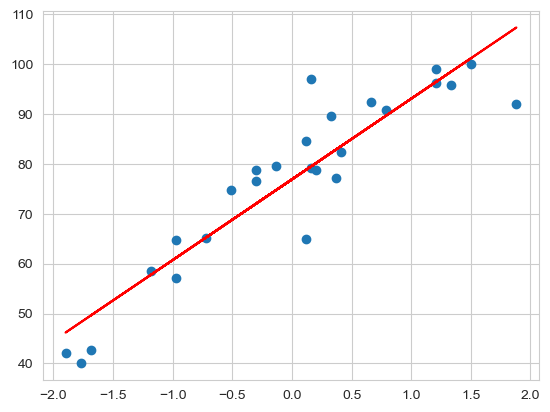

In [25]:
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, regression.predict(X_train_scaled), "r")
plt.show()
# Önce bir scatterplot oluşturduk ve Standartize edilmiş çalışma saatleri ile notları karşılaştırarak gerçek datapointleri gördük.
# Daha sonra plot ile x eksenine standartize edilmiş çalışma saatlerini koyduk.
# Daha sonra modelimizin predict metodundan yardım alarak eğitim verilerinden ürettiğimiz tahminleri grafiğe koyduk.
# Böylece best fit line'i çizmiş olduk.

## Predictions

In [26]:
# 20 saat çalışan bir öğrenci kaç alır.

In [27]:
print(regression.predict([[20]]))
# Burada vereceğimiz çalışma saatini 4 köşeli parantez içinde vermeliyiz.
# Çünkü modellerimiz bizden tahmin yaparken bir dataframe ister
# Fakat çalışma saatlerini standartize ettiğimiz için 20 saat çalışan bir kişinin 427 alacağı söyleniyor.
# Bu nedenle tahmin yaparken çalışma saatlerini standartize edilmiş şekilde vermemiz gerekiyor.

[400.47973694]


In [28]:
print(regression.predict(scaler.transform([[20]])))
# Eğer scaler modelimiz üzerinden train datası parametreleri ile gerçek çalışma saatini transform edersek tahmin yapabiliriz.
# Yani train datasetindeki parametreleri kullanarak çalışma saatini standartize ettik ve tahmin yaptık.

[84.70590731]


In [29]:
print(regression.predict(scaler.transform([[15]])))
print(regression.predict(scaler.transform([[30]])))
print(regression.predict(scaler.transform([[10]])))
print(regression.predict(scaler.transform([[5]])))

[73.37889111]
[107.3599397]
[62.05187491]
[50.72485871]


In [30]:
print(regression.predict(X_test_scaled))
print(X_test_scaled)
# Eğer modelimize Standartize edilmiş X_test verilerini verirsek bizim için her test değerini tahmin edebilir.
# Biz bu senouçları görselleştirebilir ve korelasyonu gözlemleyebiliriz. Korelasyon pozitifse modelimiz büyük ölçüde doğrudur.
# Ya da hata metriklerini ve R**2 değerlerini inceleyebiliriz.
# Bunlar bizim modelimizin ne kadar doğru tahmin yaptığını ortaya koyacaktır.

[50.95139904 86.97131054 92.40827832 52.31064098 61.14571361 48.23291515
 87.65093152]
[[-1.60435944]
 [ 0.62203261]
 [ 0.95809179]
 [-1.52034465]
 [-0.97424848]
 [-1.77238903]
 [ 0.66404001]]


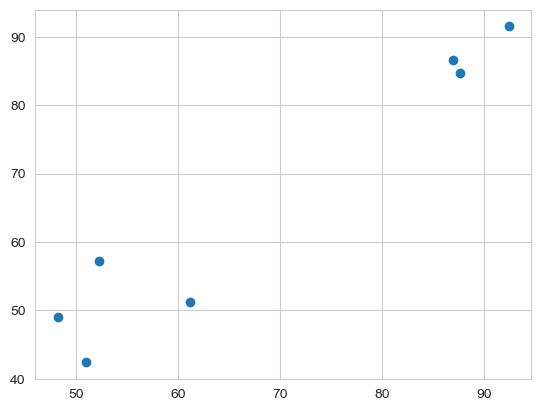

In [31]:
y_pred_test = regression.predict(X_test_scaled) 
plt.scatter(x=y_pred_test, y=y_test)
plt.show()
# Burada y_pred_test değişkenimiz X test verilerinden yola çıkarak yaptığımız tahminlerdir.
# y_test ise gerçek verilerdir. Yani biz bu iki sonucu karşılaştırarak modelimizin doğruluğunu ölçebiliriz.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)
# Burada sklearn.metrics modülünden MSE, MAE, ve R2 skorunu hesaplayan metodları içe aktardık.
# hesaplarken her metoda önce tahminlerimizi içeren tahmin verisini ve sonra y_test, yani test için ayrılan çıktıları veriyoruz.
# Böylece gerçek sonuçları ve modelin tahminlerini karşılaştırabiliyoruz.
# Modelimiz gayet iyi çalışmaktadır.
# Fakat modelin train-test split kısmını yaparken random state değerlenie dikkat etmek gerekir.

MSE:  29.45839048833392
MAE:  4.054868128856142
RMSE:  5.427558427906043
R2 Score:  0.9196596206825491
